### Teste DS Murabei - Natália Felix

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### cat_student_data:

In [381]:
## Leitura do arquivo "cat_student_data.csv"

data_cat_student = pd.read_csv ('cat_student_data.csv', sep=';')
data_cat_student

,school,student,variable,value
1,1,143,intake,bottom 25%
2,1,145,intake,mid 50%
3,1,142,intake,top 25%
4,1,141,intake,mid 50%
5,1,138,intake,mid 50%
...,...,...,...,...
12173,65,46,vr,mid 50%
12174,65,59,vr,mid 50%
12175,65,60,vr,mid 50%
12176,65,61,vr,mid 50%


In [382]:
## Separação da informação necessária, nesse caso, optou-se por filtrar as informações 
## que tinham por referência a variável "intake":

data_cat_student  = data_cat_student  [(data_cat_student .variable == 'intake')]
print(len(data_cat_student[data_cat_student.variable == 'intake'].value))

3947


In [383]:
## Visualização das 5 primeiras linhas do dataframe:

data_cat_student.head()

,school,student,variable,value
1,1,143,intake,bottom 25%
2,1,145,intake,mid 50%
3,1,142,intake,top 25%
4,1,141,intake,mid 50%
5,1,138,intake,mid 50%


In [384]:
## Devido à utilização das informações contidas no df, optou-se por "transformar" os dados escritos em dados numéricos,
## para que pudessem ser realizadas operações com os mesmos:

## bottom 25% (abaixo) = 0.25
## mid 50% (média) = 0.50
## top 25% (acima) = 0.75

data_cat_student.value = data_cat_student.value.map({'bottom 25%':'0.25','mid 50%':'0.50', 'top 25%':'0.75'})
data_cat_student.value = data_cat_student.value.astype(float)
data_cat_student.student = data_cat_student.student.astype(float)
data_cat_student.drop(['variable'], axis = 1, inplace = True)

In [385]:
## Obtenção das informações acima colhidas, bem como a confirmção dos tipos das colunas no df em questão:
data_cat_student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3947 entries, 1 to 4059
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   school   3947 non-null   int64  
 1   student  3947 non-null   float64
 2   value    3947 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 123.3 KB


In [386]:
## Visualização do df após as alterações realizadas:
data_cat_student

,school,student,value
1,1,143.0,0.25
2,1,145.0,0.50
3,1,142.0,0.75
4,1,141.0,0.50
5,1,138.0,0.50
...,...,...,...
4055,65,46.0,0.25
4056,65,59.0,0.50
4057,65,60.0,0.50
4058,65,61.0,0.50


#### cat_school_data:

In [388]:
## Leitura do arquivo "cat_school_data.csv" e visualização do tamanho do mesmo:

data_cat_school = pd.read_csv ('cat_school_data.csv', sep=';')
data_cat_school

,school,variable,value
0,1,schgend,mixed
1,2,schgend,girls
2,3,schgend,mixed
3,4,schgend,mixed
4,5,schgend,mixed
...,...,...,...
125,61,type,Mxd
126,62,type,Mxd
127,63,type,Mxd
128,64,type,Sngl


In [389]:
## Obtenção das informações do novo df:
data_cat_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   school    130 non-null    int64 
 1   variable  130 non-null    object
 2   value     130 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [390]:
## Verificação da existência de dados nulos no arquivo:

data_cat_school.isna().sum()

school      0
variable    0
value       0
dtype: int64

In [391]:
## Para obtenção da informação necessária, nesse caso, o gênero da escola, filtrou-se apenas os dados pertencentes
## à variável "schgend". Após obtidas as informações pertencentes ao gênero, a coluna "variable" foi removida, uma vez que esta
## já não seria mais utilizada nas próximas etapas:

data_cat_school = data_cat_school [(data_cat_school.variable == 'schgend')]
data_cat_school.drop(['variable'], axis = 1, inplace = True)
data_cat_school

,school,value
0,1,mixed
1,2,girls
2,3,mixed
3,4,mixed
4,5,mixed
...,...,...
60,61,mixed
61,62,mixed
62,63,mixed
63,64,boys


#### data_num_student:

In [392]:
## Leitura do arquivo "num_student_data.csv" e sua visualização:
data_num_student = pd.read_csv ('num_student_data.csv', sep=';')
data_num_student

,school,student,variable,value
1,1,143.0,normexam,"0,2613242"
2,1,145.0,normexam,"0,1340672"
3,1,142.0,normexam,"-1,723882"
4,1,141.0,normexam,"0,9675862"
5,1,138.0,normexam,"0,5443412"
...,...,...,...,...
8114,65,46.0,standLRT,"1,8588312"
8115,65,59.0,standLRT,"-1,03397"
8116,65,60.0,standLRT,"0,4537562"
8117,65,61.0,standLRT,"-0,786016"


In [393]:
## Dadas as informações acima, filtrou-se apenas os dados proveitosos para as análises a serem feitas, 
## sendo esses: "school", "student" e "variable" = "normexam", uma vez que, a pontuação dos demais exames não 
## seriam utilizadas. Após obtidas as informações necessárias, excluiu-se a coluna "variable":

data_num_student = data_num_student [(data_num_student.variable == 'normexam')]
data_num_student.drop(['variable'], axis = 1, inplace = True)
data_num_student.head()

,school,student,value
1,1,143.0,"0,2613242"
2,1,145.0,"0,1340672"
3,1,142.0,"-1,723882"
4,1,141.0,"0,9675862"
5,1,138.0,"0,5443412"


In [394]:
## Verificação das informações do df:

data_num_student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4059 entries, 1 to 4059
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   school   4059 non-null   int64  
 1   student  4014 non-null   float64
 2   value    3987 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 126.8+ KB


In [395]:
## Verificação da exitência e quantidade de dados nulos:

data_num_student.isna().sum()

school      0
student    45
value      72
dtype: int64

In [396]:
## Tamanho do df:

data_num_student.shape

(4059, 3)

In [397]:
## Transformação do tipo da coluna "value" de object para float

data_num_student['value']=data_num_student['value'].str.replace(',', '.')
data_num_student['value']=data_num_student['value'].astype(float)
data_num_student

,school,student,value
1,1,143.0,0.261324
2,1,145.0,0.134067
3,1,142.0,-1.723882
4,1,141.0,0.967586
5,1,138.0,0.544341
...,...,...,...
4055,65,46.0,NaN
4056,65,59.0,NaN
4057,65,60.0,0.004322
4058,65,61.0,0.004322


In [398]:
## "Merge"/Fusão dos dataframes visualizados acima:
new_df = pd.merge(data_cat_school, data_num_student, on='school', how='inner' )
new_df = pd.merge(data_cat_student, new_df, on= ['school', 'student'], how='right')

## Para melhor compreensão, os nomes das colunas foram alterados para suas respectivas informações de valores contidos em si:
new_df.rename(columns={"value":"intake", "value_x": "schgen", "value_y": "normexam_value"}, inplace=True)

## Tranformação do dado de gênero para um número correspondente à tal informação, sendo:
## boys = 0
## girls = 1
## mixed = 2
new_df.schgen = new_df.schgen.map({'boys':0,'girls':1, 'mixed':2})

## Substituição dos valores Nan para 0:
new_df = new_df.fillna(0)

In [399]:
new_df.head()

,school,student,intake,schgen,normexam_value
0,1,143.0,0.25,2,0.261324
1,1,145.0,0.50,2,0.134067
2,1,142.0,0.75,2,-1.723882
3,1,141.0,0.50,2,0.967586
4,1,138.0,0.50,2,0.544341


In [400]:
## Atruibuição dos valores das variáveis de entrada e saída do modelo:
x = new_df[['school', 'intake', 'schgen']]
y = new_df[['normexam_value']]

## Divisão do dataset entre treino e teste:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Definição do algoritmo a ser utilizado:
model = RandomForestRegressor()

model.fit(x_train,y_train) #execução do treino com a base separada para tal função (base de treino) 
y_pred = model.predict(x_test) #predição que será utilizada na avaliação

## R² coeficiente de determinação - para obtenção da quantidade de variância do modelo, ou seja, 
## a proximidade das medidas reais do modelo
R2 = r2_score(y_test,y_pred) 
print(f'R2: {R2}') 

## Métrica similara ao R², porém sem demonstrar um viés devido acréscimo de dados ou features no modelo como occore na 
## métrica anterior:
adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - x_train.shape[1] - 1))

print(f'R2 Ajustado: {adj_r2}')

## Erro Quadrático Médio consiste na média do erro das previsões ao quadrado:
MSE = mean_squared_error(y_test,y_pred)
print(f'MSE: {MSE}')

## Raiz do erro quadrático médio:
RMSE = mean_squared_error(y_test,y_pred,squared=False) 
print(f'RMSE: {RMSE}')

## Erro Absoluto Médio consiste na média das distâncias entre valores preditos e reais:
MAE = mean_absolute_error(y_test,y_pred)
print(f'MAE: {MAE}')

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Erro Percentual Absoluto Médio exprime uma porcentagem, obtida através da divisão da diferença entre predito 
## e real pelo valor real.

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {MAPE}")

## Há também a RMSLE (Raiz do erro médio quadrático e logarítmico) que, neste caso, não pode ser 
## usado por ter valores negativos
# RMSLE = mean_squared_log_error(y_test,y_pred)
# print(f'RMSLE: {RMSLE}')

R2: 0.30485095079160485
R2 Ajustado: 0.30313735412141163
MSE: 0.6506234339617527
RMSE: 0.8066123194954021
MAE: 0.6417241878112491
MAPE: inf


<AxesSubplot:>

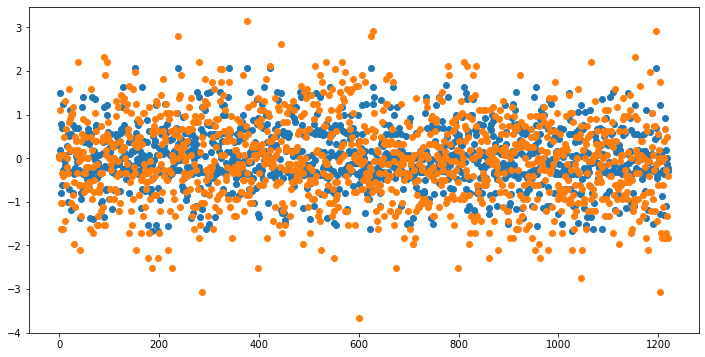

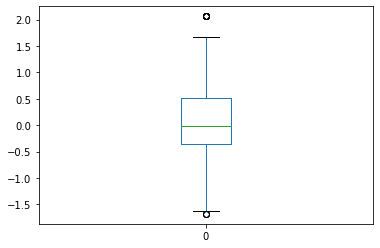

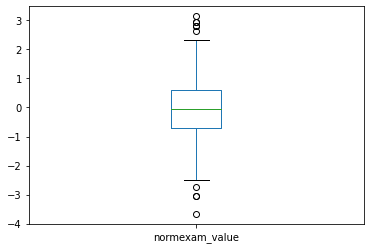

In [401]:
# Transformando resultados em dataframe
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)

# Resetando o index
y_test.reset_index(inplace=True,drop=True)

# Definindo
plt.figure(figsize=(12,6))
plt.scatter(y_pred.index,y_pred[0])
plt.scatter(y_test.index,y_test['normexam_value'])

y_pred.plot.box()
y_test.plot.box()

Descartando os outliers dos valores reais, dentro da média vista através da plotagem do scatterplot, seria possível afirmar que os resultados seriam muito mais satisfatórios somente pela sua exclusão. Logo, o modelo consegue predizer bem dentro das notas de normalidade.

In [402]:
data = [[3,.75,2]]

# Criando um dataframe do pandas
teste = pd.DataFrame(data, columns=['school','intake','schgen'])

model.predict(teste)

array([-0.62182049])

2    2173
1    1377
0     517
Name: schgen, dtype: int64


<AxesSubplot:>

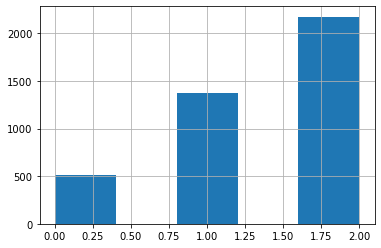

In [408]:
## Visualização da distrbuição dos gêneros das escolas através do histograma:

schgen_df = new_df['schgen']
print(schgen_df.value_counts())
schgen_df.hist(bins=5)

In [409]:
## Novo df com as catergorias de gênero e notas dos exames:
col = ['schgen', 'normexam_value']
sch_norm = new_df.filter(items = col)
sch_norm.head()

,schgen,normexam_value
0,2,0.261324
1,2,0.134067
2,2,-1.723882
3,2,0.967586
4,2,0.544341


In [410]:
## Divisão das notas de acordo com gênero da escola, para visualização no bloxpot a seguir:

mixed = sch_norm[sch_norm['schgen']==2]['normexam_value']
girls = sch_norm[sch_norm['schgen']==1]['normexam_value']
boys = sch_norm[sch_norm['schgen']==0]['normexam_value']

boxplot_mixed = pd.DataFrame(mixed)
boxplot_girls = pd.DataFrame(girls)
boxplot_boys = pd.DataFrame(boys)

boxplot_mixed.rename(columns={"normexam_value": "mixed"}, inplace=True)
boxplot_girls.rename(columns={"normexam_value": "girls"}, inplace=True)
boxplot_boys.rename(columns={"normexam_value": "boys"}, inplace=True)

mixed   -0.099637
dtype: float64
girls    0.146406
dtype: float64
boys    0.021442
dtype: float64


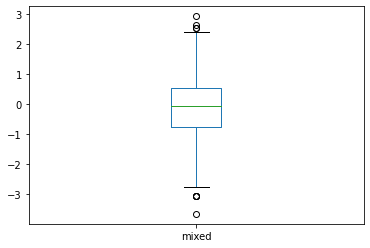

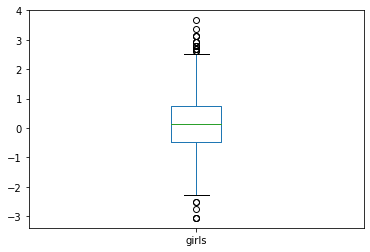

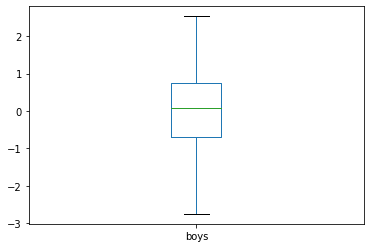

In [411]:
## Boxplot foi feito para representar a distribuição e valores discrepantes (outliers) dos dados por meio de quartis:
boxplot_mixed.plot.box()
boxplot_girls.plot.box()
boxplot_boys.plot.box()

## Visualização das médias das notas pelo gênero da escola:
print(np.mean(boxplot_mixed))
print(np.mean(boxplot_girls))
print(np.mean(boxplot_boys))

##### *Conclusão:* 

*Dadas as informações obtidas das médias acima, pode-se concluir que, as escolas cujo gênero é feminino somente, possui maior eficiência na sua formação de acordo com a avaliação das médias do normexam.*